In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

In [156]:
data = pd.read_csv('resources/market-price_hit.csv')
data

,date,price
0,2020-09-27 00:00:00,10732.40
1,2020-09-28 00:00:00,10774.24
2,2020-09-29 00:00:00,10692.33
3,2020-09-30 00:00:00,10840.80
4,2020-10-01 00:00:00,10777.92
...,...,...
361,2021-09-23 00:00:00,43604.76
362,2021-09-24 00:00:00,44888.96
363,2021-09-25 00:00:00,42815.56
364,2021-09-26 00:00:00,42742.01


In [157]:
print(data)

                    date     price
0    2020-09-27 00:00:00  10732.40
1    2020-09-28 00:00:00  10774.24
2    2020-09-29 00:00:00  10692.33
3    2020-09-30 00:00:00  10840.80
4    2020-10-01 00:00:00  10777.92
..                   ...       ...
361  2021-09-23 00:00:00  43604.76
362  2021-09-24 00:00:00  44888.96
363  2021-09-25 00:00:00  42815.56
364  2021-09-26 00:00:00  42742.01
365  2021-09-27 00:00:00  43182.63

[366 rows x 2 columns]


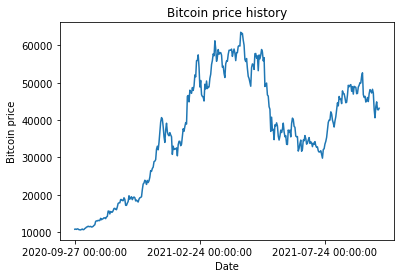

In [158]:
x = data['date']
y = data['price']
plt.xlabel('Date')
plt.ylabel('Bitcoin price')
plt.title('Bitcoin price history')
plt.plot(x, y)
plt.xticks(x[::150]);

In [159]:
# Difference method
deg = 0.0
ERR = 10000
diff_k = [1 for _ in range(0, len(y))]
diff = [0 for _ in range(0, len(y))]

for i in range(2, len(y)):
    diff[i] = y[i] - y[i - 1]

diff_k[1] = sum(diff)
diff.clear()
diff = [0 for _ in range(0, len(y))]

for j in range(2, len(y)):
    for i in range(j + 1, len(y)):
        diff[i] = y[i] - y[i - 1]
    diff_k[j] = sum(diff) - diff_k[j - 1]
    diff.clear()
    diff = [0 for _ in range(0, len(y))]
for i in range(0, len(diff_k)):
    if abs(diff_k[i]) < ERR:
        deg = i + 1
        break

In [160]:
diff_k

[1,
 32408.389999999992,
 81.91000000000349,
 32259.91999999999,
 144.79000000000815,
 32418.599999999984,
 188.97000000001572,
 32441.889999999978,
 67.28000000002066,
 32326.78999999998,
 252.1000000000131,
 32259.72999999998,
 -0.3999999999869033,
 32119.839999999982,
 -239.87999999998283,
 32045.89999999998,
 -403.3099999999831,
 32157.699999999975,
 -406.3899999999776,
 32085.28999999998,
 -230.22999999998137,
 32046.349999999984,
 -371.9199999999837,
 31796.389999999978,
 -539.2199999999793,
 30890.28999999998,
 -697.9099999999817,
 30936.019999999975,
 -881.8499999999767,
 31027.70999999997,
 -921.4499999999753,
 30452.60999999997,
 -558.9799999999741,
 30282.949999999968,
 -665.0399999999718,
 30037.34999999997,
 -613.5999999999694,
 30221.05999999997,
 -1061.7399999999689,
 30088.779999999962,
 -2497.5399999999645,
 30084.399999999965,
 -1741.6099999999715,
 29433.63999999997,
 -1579.5399999999718,
 29445.12999999997,
 -1971.1499999999724,
 28858.20999999997,
 -2014.9099999999

In [161]:
print('Degree =', deg)

Degree = 1


In [162]:
time = np.arange(0, len(y))

# Data for polynom
A = time[:, np.newaxis] ** [0, 1, 2, 3]
# Data for trigonometry
table = []
for i in range(len(y)):
    table.append([1, np.sin(i), np.cos(i) * i, i])
# Data for spline
t = [i * 5 for i in range(1, 50)]

In [163]:

# Search coef of spline and their points
split_coef = splrep(time, y, task=-1, t=t, k=3)
split_coef

(array([  0.,   0.,   0.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,
         40.,  45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,
         95., 100., 105., 110., 115., 120., 125., 130., 135., 140., 145.,
        150., 155., 160., 165., 170., 175., 180., 185., 190., 195., 200.,
        205., 210., 215., 220., 225., 230., 235., 240., 245., 365., 365.,
        365., 365.]),
 array([10738.58412278, 10747.66105847, 10828.2911677 , 10262.63847949,
        11880.92833554, 10866.69566538, 12607.19328666, 13563.61371186,
        13178.26873683, 15008.71812348, 15819.14363831, 15769.95277092,
        19526.29061641, 17611.69190245, 18330.78221618, 20267.50805679,
        16973.33611124, 20497.71295963, 24118.80391607, 23839.64321337,
        28552.74944481, 33031.94877703, 41705.46430759, 34454.85867155,
        37843.68322567, 28698.6392697 , 35387.63793176, 32519.52046315,
        47104.32523169, 44654.99169954, 56606.69495356, 51976.90339559,
        44775.3214973 , 48888.91

In [164]:
# Search coef of polynom
polynom_coef = np.linalg.lstsq(table, y, rcond=None)[0]
polynom_coef

array([ 2.10459616e+04, -1.92776952e+02, -5.61508938e-01,  8.83371991e+01])

In [165]:
# Search coef of trigonometry
trigonometry_coef = np.linalg.lstsq(A, y, rcond=None)[0]
trigonometry_coef

array([-2.72511656e+03,  5.82383916e+02, -2.19229545e+00,  2.55095541e-03])

In [166]:
# calculate for points
polynom_points = []
trigonometry_points = []
for i in range(len(y)):
    # Point for polynom
    polynom_points.append(polynom_coef[0] + polynom_coef[1] * np.sin(i) + polynom_coef[2] * i * np.cos(i) + polynom_coef[3] * i)
    # Points for trigonometry
    trigonometry_points.append(trigonometry_coef[0] + trigonometry_coef[1] * i + trigonometry_coef[2] * i ** 2 + trigonometry_coef[3] * i ** 3)
# Points for spline
spline_points = splev(time, split_coef)

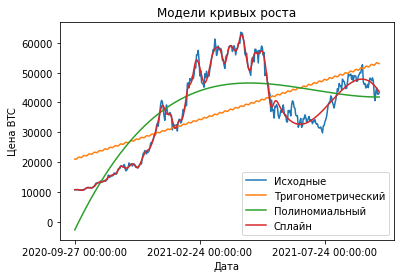

In [167]:
plt.title('Модели кривых роста')
plt.plot(x, y, label="Исходные")
plt.plot(x, polynom_points, label="Тригонометрический")
plt.plot(x, trigonometry_points, label="Полиномиальный")
plt.plot(x, spline_points, label="Сплайн")
plt.xlabel('Дата')
plt.ylabel('Цена BTC')
plt.legend()
plt.xticks(x[::150]);